In [61]:
%matplotlib inline

from __future__ import division

import matplotlib.pyplot as plt


import pywt
import numpy as np

from keras.datasets import mnist
from metrics import *

from sklearn.linear_model import LogisticRegression as LR
from sklearn import svm

import pywt

from data_utils import dim

no cv2... continuing...


In [ ]:
x = np.random.rand(1000)

In [ ]:
epsilon = 1e-9
mse = lambda y,y_hat : np.abs(sum((y-y_hat)**2/np.maximum(epsilon, y**2)))

x_hat = np.fft.ifft(np.fft.fft(x))

from scipy import fftpack

x_hat2 = fftpack.ifft(fftpack.fft(x))

power = lambda x: np.sum(x**2)

plt.plot(x_hat)
print mse(x[:], x_hat[:])
print mse(x, x_hat2)
print x_hat.dtype
print power(np.real(x_hat)), power(np.imag(x_hat))

In [37]:

ni = 775
nd = 2500

x = np.random.rand(*(ni, nd))
y = np.round(np.random.rand(ni))

yy = []
yy_ = []

n_sim = 1

for i in range(n_sim):
    model = svm.SVC(cache_size=1000)#LR(n_jobs=-1)
    model.fit(x, y)
    yy.extend(y)
    yy_.extend(model.predict(x))

metrics(yy, y)
metrics(yy, yy_)

accuracy: 1.0
precision: 1.0
recall 1.0
accuracy: 0.510967741935
precision: 0.510967741935
recall 1.0


In [21]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_train, X_test = X_train.reshape((-1, 28*28)), X_test.reshape((-1, 28*28))

In [26]:
XX_train, XX_test = X_train/255, X_test/255

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score

model = svm.SVC(cache_size=1000, decision_function_shape='ovo')
model.fit(XX_train, Y_train)

print accuracy_score(Y_test, model.predict(XX_test))

In [ ]:
from data_utils import *

c_f, i_f, d_f = get_data_dirs()

for c,i,d in zip(c_f, i_f, d_f):
    print c
    print i
    print d
    print

In [34]:
print 1

1


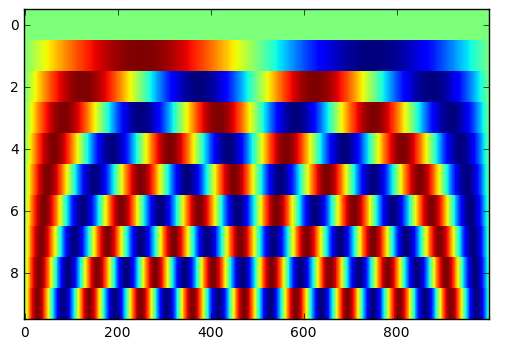

In [68]:
x = np.arange(1000) * np.arange(10)[:,None]
plt.imshow(x, aspect='auto')

y = np.sin(x*2*np.pi/1000)

plt.imshow(y, aspect='auto', interpolation='none')

coeffs = pywt.wavedec(y, 'coif2')

plt.figure(2)


(10, 1000)


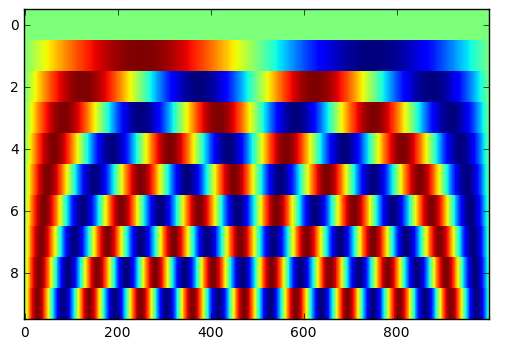

In [70]:
w = np.array(coeffs[0])
print w.shape

plt.imshow(w, aspect='auto', interpolation='none')

In [71]:
dim(y)

10 1000 


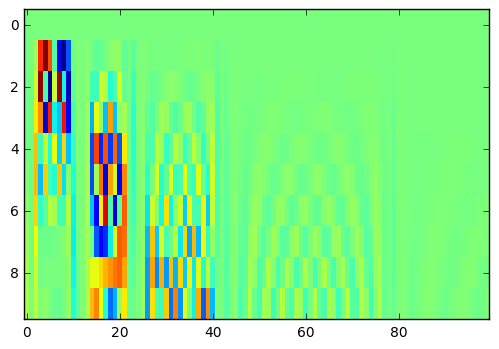

In [82]:
w2 = []
for i,s in enumerate(y):
    coeffs = pywt.wavedec(s, 'coif1')
    coeffs = np.array([i for j in coeffs for i in j])
    w2.append(coeffs)

w2 = np.array(w2)[:,:100]    
    
plt.imshow(w2, aspect='auto', interpolation='none')